In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Predicting the Delivery time from Sorting time data

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [2]:
data_delivery = pd.read_csv('delivery_time.csv')
data_delivery.shape

(21, 2)

In [3]:
data_delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data_delivery.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1, inplace=True)

In [6]:
data_delivery.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data_delivery.corr().style.background_gradient(cmap='coolwarm')

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


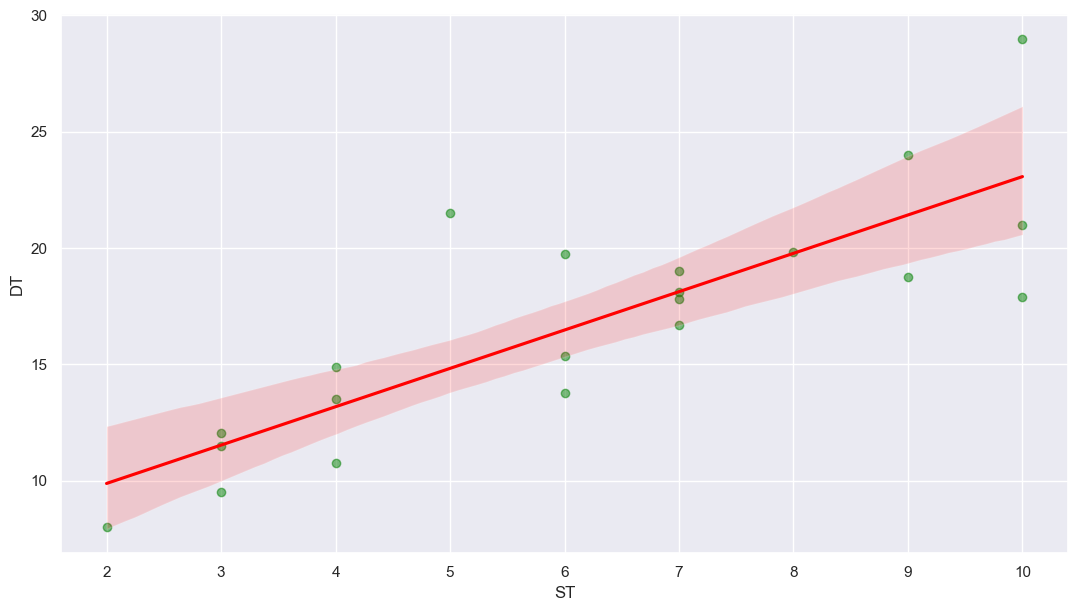

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,7))
sns.regplot(x="ST", y="DT", data=data_delivery, scatter_kws={"color": "green", 'alpha': 0.5}, line_kws={"color": "red"})
plt.show()

Text(0.5, 1.0, 'NO Transformation')

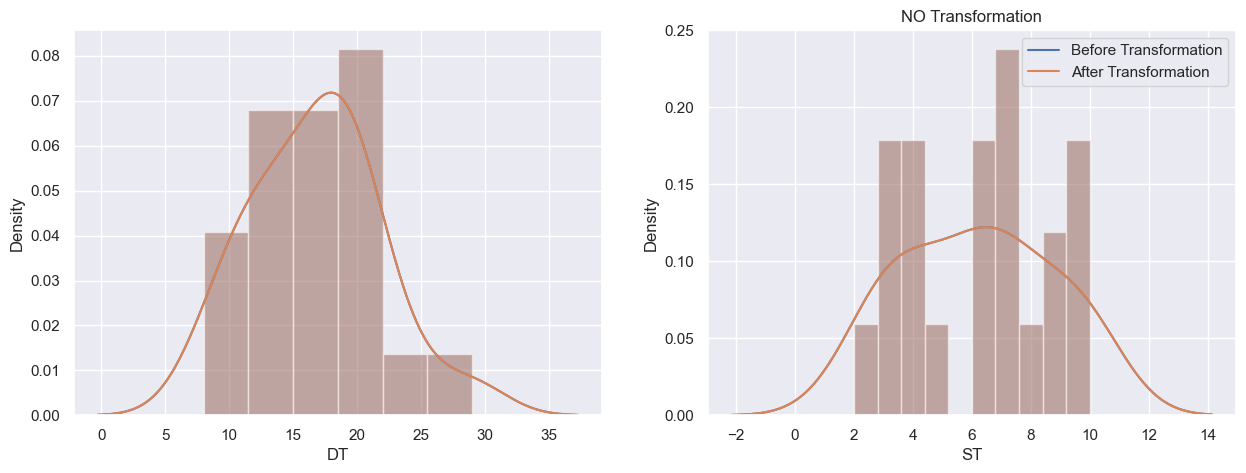

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(data_delivery['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(data_delivery['DT'], bins = 6, kde = True, ax=axes[0])

sns.distplot(data_delivery['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(data_delivery['ST'], bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("NO Transformation")

Text(0.5, 1.0, 'Log Transformation')

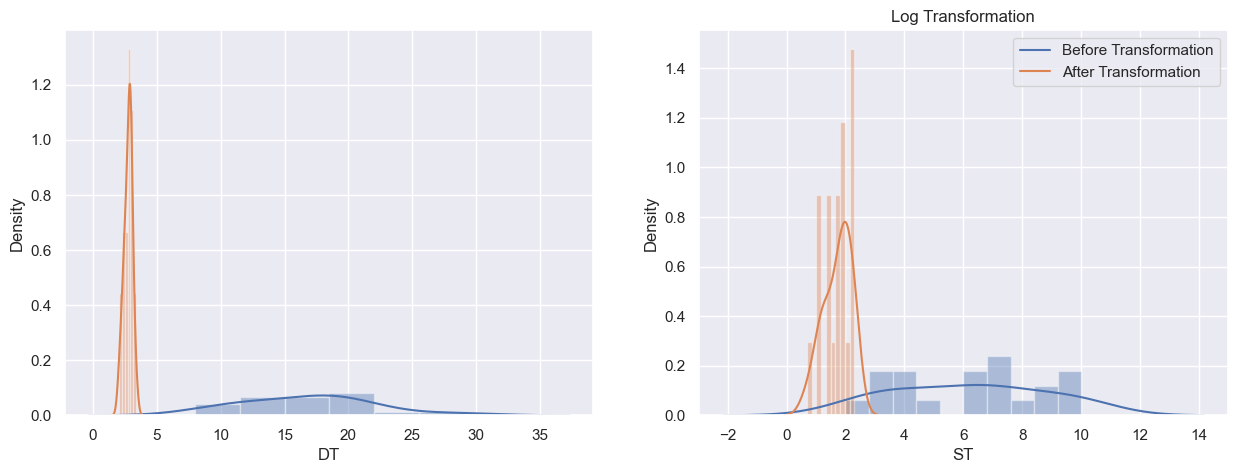

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(data_delivery['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.log(data_delivery['DT']), bins = 6, kde = True, ax=axes[0])

sns.distplot(data_delivery['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.log(data_delivery['ST']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Log Transformation")

Text(0.5, 1.0, 'Squareroot Transformation')

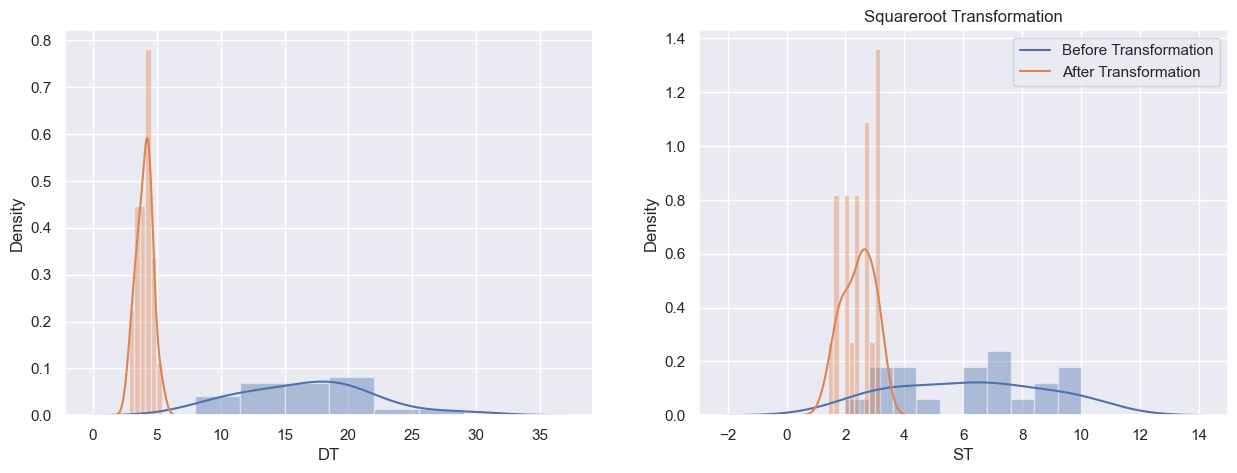

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(data_delivery['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.sqrt(data_delivery['DT']), bins = 6, kde = True, ax=axes[0])

sns.distplot(data_delivery['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.sqrt(data_delivery['ST']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Squareroot Transformation")

Text(0.5, 1.0, 'Cuberoot Transformation')

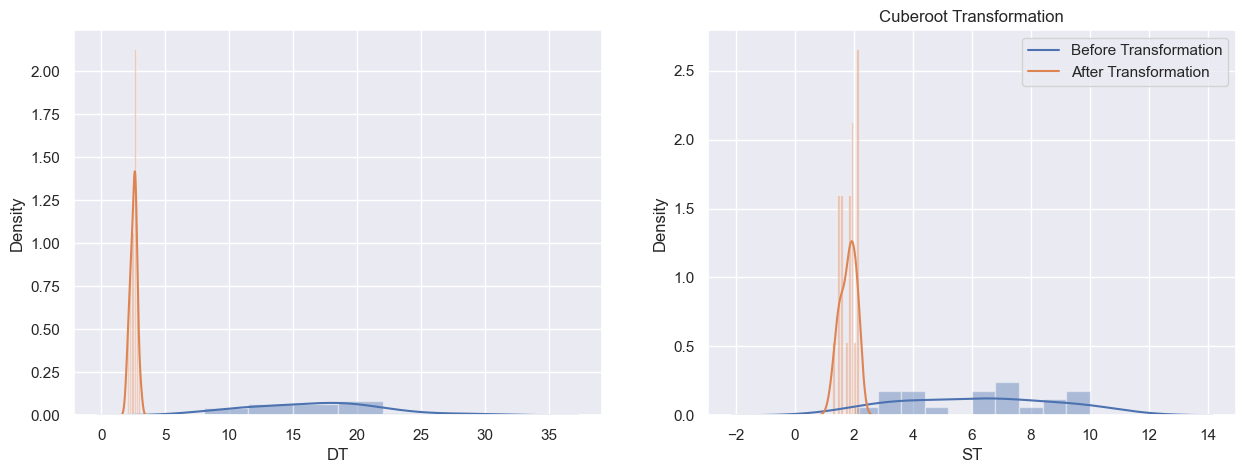

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(data_delivery['DT'], bins = 6, kde = True, ax=axes[0])
sns.distplot(np.cbrt(data_delivery['DT']), bins = 6, kde = True, ax=axes[0])

sns.distplot(data_delivery['ST'], bins = 10, kde = True, ax=axes[1])
sns.distplot(np.cbrt(data_delivery['ST']), bins = 10, kde = True, ax=axes[1])

labels = ['Before Transformation','After Transformation']
plt.legend(labels)
plt.title("Cuberoot Transformation")

In [47]:
model_reg = smf.ols("DT~ST",data = data_delivery).fit()

In [48]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        19:57:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model_log = smf.ols("np.log(DT)~np.log(ST)",data = data_delivery).fit()


In [41]:
model_sqrt = smf.ols("np.sqrt(DT)~np.sqrt(ST)",data = data_delivery).fit()

In [42]:
model_cbrt = smf.ols("np.cbrt(DT)~np.cbrt(ST)",data = data_delivery).fit()


In [49]:
pred_y =np.square(model_reg.predict(data_delivery['ST']))
pred_y_log =np.exp(model_log.predict(data_delivery['ST']))
pred_y_sqrt =np.square(model_sqrt.predict(data_delivery['ST']))
pred_y_cbrt =pow(model_cbrt.predict(data_delivery['ST']),3)

In [50]:
rmse_reg =np.sqrt(mean_squared_error(data_delivery['DT'], pred_y))
rmse_log =np.sqrt(mean_squared_error(data_delivery['DT'], pred_y_log))
rmse_sqrt =np.sqrt(mean_squared_error(data_delivery['DT'], pred_y_sqrt))
rmse_cbrt =np.sqrt(mean_squared_error(data_delivery['DT'], pred_y_cbrt))

In [81]:
RMSE_values = rmse_reg, rmse_log, rmse_sqrt, rmse_cbrt

In [88]:
R2 = []
ADJ_R2 = []
MODELS = ['model_reg', 'model_log', 'model_sqrt', 'model_cbrt']
for i in MODELS:
    model = globals()[i] 
    R2.append(model.rsquared)
    ADJ_R2.append(model.rsquared_adj)
models_data = pd.DataFrame({'R_Squared':R2,'Adj_R_squared':ADJ_R2, 'RMSE':RMSE_values },index=MODELS)

models_data

,R_Squared,Adj_R_squared,RMSE
model_reg,0.682271,0.665549,312.528673
model_log,0.772161,0.760170,2.745829
model_sqrt,0.729201,0.714949,2.762294
model_cbrt,0.744117,0.730649,2.755584


Here, we can see moldel_log that is logarithmic tranformation have less RMSE and high R2 and R2 adjusted values, so this is the best model

In [89]:
#Coefficients
model_log.params

Intercept     1.741987
np.log(ST)    0.597522
dtype: float64

In [90]:
#t and p-Values
#print(model_delivery.tvalues, '\n', model_delivery.pvalues)    
print(f'model t-values:\n{model_log.tvalues}\n-----------------\nmodel p-values: \n{model_log.pvalues}')    

model t-values:
Intercept     13.085552
np.log(ST)     8.024484
dtype: float64
-----------------
model p-values: 
Intercept     5.921137e-11
np.log(ST)    1.601539e-07
dtype: float64


In [91]:
data_delivery.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [96]:
pred = model_log.predict(data_delivery.ST)
pred.head()

0    3.117833
1    2.570329
2    2.812603
3    3.054878
4    3.117833
dtype: float64

In [94]:
predicted = pd.DataFrame()
predicted['ST'] = data_delivery.ST
predicted['DT'] = data_delivery.DT
predicted['Predicted_DT'] = pd.DataFrame(np.exp(model_log.predict(predicted.ST)))
predicted

,ST,DT,Predicted_DT
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
